<a href="https://colab.research.google.com/github/pszwed-ai/lab-eksploracja-danych/blob/main/Klasyfikacja_gatunk%C3%B3w_muzyki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikacja gatunków muzyki
## Imię i nazwisko
Celem laboratorium jest przeprowadzenie klasyfikacji gatunków muzyki na podstawie wyodrębnionych cech.
* Zastosujemy skalowanie cech
* Porównamy kilka klasyfikatorów
* Zastosujemy ciąg przetwarzania (*pipeline*)



## 1. Pobieramy i wczytujemy dane

In [ ]:
!wget https://dysk.agh.edu.pl/s/foAZjcKxtX2TQj5/download -O gitzan_small_features.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('gitzan_small_features.csv').drop(columns = ['Unnamed: 0'])
df.head()


,genre,file,audio,sr,zero_crossing_rate_mean,zero_crossing_rate_var,spectral_centroid_mean,spectral_centroid_var,rms_mean,rms_var,spectral_rolloff_mean,spectral_rolloff_var,mfcc01_mean,mfcc01_var,mfcc02_mean,mfcc02_var,mfcc03_mean,mfcc03_var,mfcc04_mean,mfcc04_var,mfcc05_mean,mfcc05_var,mfcc06_mean,mfcc06_var,mfcc07_mean,mfcc07_var,mfcc08_mean,mfcc08_var,mfcc09_mean,mfcc09_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,chroma01_mean,chroma01_var,chroma02_mean,chroma02_var,chroma03_mean,chroma03_var,chroma04_mean,chroma04_var,chroma05_mean,chroma05_var,chroma06_mean,chroma06_var,chroma07_mean,chroma07_var,chroma08_mean,chroma08_var,chroma09_mean,chroma09_var,chroma10_mean,chroma10_var,chroma11_mean,chroma11_var,chroma12_mean,chroma12_var,tempo
0,classical,classical.00009.wav,[ 0.01455688 0.02090454 0.01434326 ... -0.03...,22050,0.056318,0.000273,1216.490186,44096.597865,0.023794,0.000126,2561.896278,194029.170833,-356.105896,5138.998047,139.812668,594.842407,-6.278577,222.142578,43.177387,75.920815,-8.851788,121.299347,11.047903,64.212715,-8.375142,70.260994,4.419640,55.727222,-8.284429,84.148659,8.676265,59.429455,-8.135021,59.158836,3.428734,62.910938,-1.439430,81.050583,-0.422975,75.628326,-1.727986,81.841583,-0.289919,79.411140,-0.660843,80.768028,1.160320,105.002174,-0.618511,92.521919,-0.254033,88.053047,0.330077,0.122640,0.224335,0.028558,0.426305,0.137994,0.416318,0.118238,0.181330,0.029370,0.179326,0.057382,0.232602,0.061283,0.321805,0.099639,0.213113,0.057743,0.254609,0.071775,0.281618,0.093348,0.184853,0.027074,129.199219
1,classical,classical.00004.wav,[-0.01077271 -0.02001953 -0.02426147 ... -0.10...,22050,0.113025,0.000160,1705.219843,19385.506566,0.042267,0.000015,3173.654579,90702.809277,-259.915131,559.994202,118.950165,220.623672,-35.617493,142.532074,31.963696,64.236458,-16.525824,75.869499,10.616533,58.395416,-15.653919,56.340309,7.417118,109.246628,-5.822312,96.478905,8.268572,96.748726,-17.982002,184.843124,-1.185533,161.261414,-6.355772,104.342644,2.748989,143.830902,-2.585194,83.438316,4.403328,83.138359,-4.125299,69.470558,-4.787770,131.776337,-4.774069,115.447807,-4.603728,217.122009,0.326663,0.115534,0.140226,0.024339,0.249061,0.118054,0.126175,0.013594,0.341997,0.136070,0.241625,0.105913,0.122987,0.035079,0.129966,0.041241,0.183229,0.070243,0.310166,0.124506,0.182775,0.055630,0.304015,0.101638,107.666016
2,classical,classical.00002.wav,[-0.04046631 -0.07815552 -0.08737183 ... -0.06...,22050,0.090184,0.000153,1490.378080,8607.935700,0.043848,0.000075,2785.054800,27281.869279,-235.253723,857.942932,141.109985,197.688095,-34.670734,151.697357,30.966612,136.075378,-16.380020,51.464291,23.110828,81.581482,-11.030149,79.478058,7.638682,59.445889,-19.011942,50.834618,4.219429,77.911613,-11.827600,60.403744,8.911826,67.262627,-1.431638,99.733551,4.288130,81.594810,1.475192,94.948868,3.171561,85.150909,-1.309433,77.170746,2.945178,74.202660,-1.655027,59.096081,-2.896193,53.000439,0.197408,0.018763,0.423735,0.123738,0.361969,0.106689,0.232111,0.040728,0.393312,0.135134,0.146246,0.012602,0.232608,0.083900,0.141548,0.021263,0.281557,0.076378,0.286905,0.087733,0.178080,0.016680,0.460017,0.150065,99.384014
3,classical,classical.00003.wav,[-0.0083313 -0.02258301 -0.04367065 ... 0.00...,22050,0.109106,0.000559,1528.064761,30246.396563,0.029435,0.000148,2915.380371,102374.413265,-326.861084,3202.030518,127.402405,309.813385,-30.606897,462.589783,37.458172,127.535774,-5.300833,131.176254,20.819963,116.825882,-1.774824,72.766998,-4.613475,100.286743,-4.044669,93.047157,5.224090,73.665794,-0.653077,125.600029,2.794031,173.143204,7.235353,151.135330,3.975654,113.026062,-2.387836,154.935699,1.499585,125.197098,0.597389,111.539612,-0.595684,151.719910,2.341259,133.902252,2.640535,210.365616,0.333985,0.140403,0.139870

Oprócz wyznaczonych cech zbiór danych zawiera oryginalne surowe dane i ich etykiety

In [ ]:
df.columns

Index(['genre', 'file', 'audio', 'sr', 'zero_crossing_rate_mean',
       'zero_crossing_rate_var', 'spectral_centroid_mean',
       'spectral_centroid_var', 'rms_mean', 'rms_var', 'spectral_rolloff_mean',
       'spectral_rolloff_var', 'mfcc01_mean', 'mfcc01_var', 'mfcc02_mean',
       'mfcc02_var', 'mfcc03_mean', 'mfcc03_var', 'mfcc04_mean', 'mfcc04_var',
       'mfcc05_mean', 'mfcc05_var', 'mfcc06_mean', 'mfcc06_var', 'mfcc07_mean',
       'mfcc07_var', 'mfcc08_mean', 'mfcc08_var', 'mfcc09_mean', 'mfcc09_var',
       'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean',
       'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var',
       'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean',
       'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var',
       'mfcc20_mean', 'mfcc20_var', 'chroma01_mean', 'chroma01_var',
       'chroma02_mean', 'chroma02_var', 'chroma03_mean', 'chroma03_var',
       'chroma04_mean'

**TODO**
* Usuń zbędne kolumny z DataFrame (te które nie są wyznaczonymi cechami)
* Przekonwertuj do postaci macierzy ```numpy``` za pomocą metody ```to_numpy()```

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler

# wyznaczanie etykiet w postci liczbowej
labels = df['genre']
le = LabelEncoder()
y = le.fit_transform(labels)
print(y)
print(le.classes_)

#usuwanie zbędnych kolumn
X= ???? TODO
print(X.shape)

[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 9 9 9 9 9 9 9 9 9 9 5 5 5 5 5 5 5
 5 5 5 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 3 3 3 3
 3 3 3 3 3 3 8 8 8 8 8 8 8 8 8 8 7 7 7 7 7 7 7 7 7 7]
['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
(100, 73)


## 2. Klasyfikacja

**TODO**
* Zastosuj klasyfikator ```GaussianNB``` i wyznacz przewidywane przez klasyfikator etykiety ```y_pred``` za pomocą funkcji ```cross_val_predict()``` z parametrem ```cv=10```
* Wyznacz macierz pomyłek za pomocą funkcji ```confusion_matrix()```, a następnie wydrukuj ją

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

y_pred = cross_val_predict(???, ???, ???, cv=10)
conf_mat = confusion_matrix(TODO ????)
print(conf_mat)

import seaborn as sns


[[4 0 0 0 0 0 0 0 2 4]
 [0 9 0 0 0 1 0 0 0 0]
 [0 0 8 0 0 0 1 1 0 0]
 [0 0 1 8 0 0 0 1 0 0]
 [2 0 0 0 6 0 1 1 0 0]
 [3 0 0 0 0 7 0 0 0 0]
 [0 0 1 2 0 0 7 0 0 0]
 [1 0 1 3 2 1 0 2 0 0]
 [1 0 0 0 1 0 0 0 7 1]
 [1 0 0 0 0 0 1 0 0 8]]


Zilustrujemy macierz pomyłek wraz z etykietami

In [ ]:
# Funkcja pobrana z https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

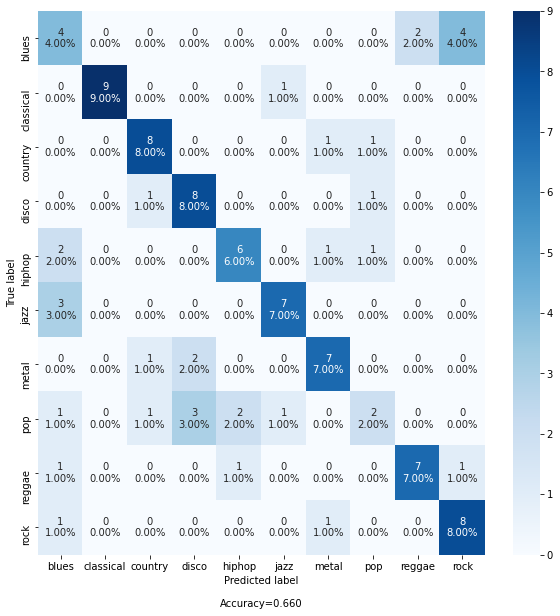

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
make_confusion_matrix(conf_mat,categories=le.classes_)

### 2.1 Skalowanie

Zastosujemy skalowanie cech:
* StandardScaler
* MinMaxScaler

**TODO**
* Jak przekształca dane StandardScaler?
* Co robi MinMaxScaler?
* Który z nich może zwrócić dane ujemne?

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data = np.asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
print("Przed skalowaniem")
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print("Po skalowaniu")
print(scaled)

print(f'scaler.mean_={scaler.mean_}')
print(f'scaler.var_={scaler.var_}')

print(f'data.mean(axis=0)={data.mean(axis=0)}')
print(f'data.std(axis=0)**2={data.std(axis=0)**2}')

print(f'scaled.mean(axis=0)={scaled.mean(axis=0)}')
print(f'scaled.std(axis=0)**2={scaled.std(axis=0)**2}')


Przed skalowaniem
[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
Po skalowaniu
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]
scaler.mean_=[5.00e+01 4.52e-02]
scaler.var_=[1.56480e+03 1.44216e-03]
data.mean(axis=0)=[5.00e+01 4.52e-02]
data.std(axis=0)**2=[1.56480e+03 1.44216e-03]
scaled.mean(axis=0)=[ 4.4408921e-17 -4.4408921e-17]
scaled.std(axis=0)**2=[1. 1.]


In [ ]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print("Po skalowaniu")
print(scaled)

Po skalowaniu
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


Zobaczmy na wyniki po skalowaniu

**TODO**
* Przeprowadź skalowanie i klasyfikację używając przeskalowanych cech
* Wyznacz przewidywane etykiety za pomocą ```cross_val_predict(..., cv=10)```
* Narysuj macierz pomyłek
* Czy skalowanie miało jakiś wpływ na wyniki?

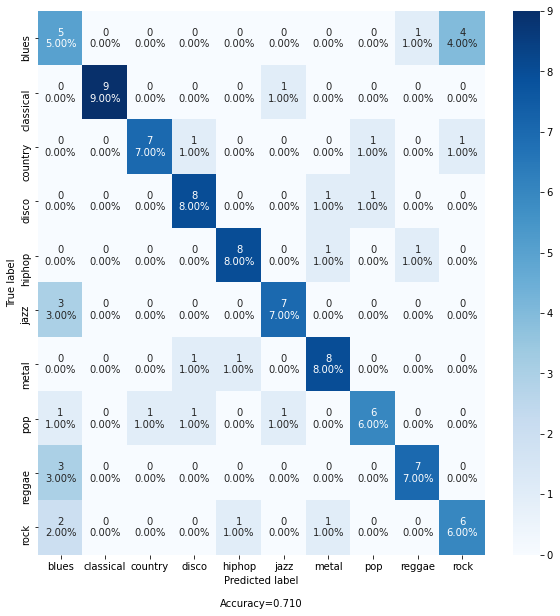

In [ ]:
scl = StandardScaler()
X_scaled=???
clf = GaussianNB()

y_pred = cross_val_predict(???, ???, ???, cv=10)
???
???


### 2.2 Budujemy ciąg przetwarzania (pipeline)

In [ ]:
from sklearn.pipeline import make_pipeline
scl = StandardScaler()
clf = GaussianNB()

pipeline = make_pipeline(scl, clf)
print(pipeline)



Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)


Pipeline ma typowe metody klasyfikatora: ```fit()``` i ```predict()```

In [ ]:
import sklearn
pipeline.fit(X,y)
y_pred = pipeline.predict(X)
print(f'Accuracy:{sklearn.metrics.accuracy_score(y,y_pred)}')


Accuracy:0.92


Oczywiście jest to wynik wyznaczony dla całego zbioru danych. W przypadku podziału na zbiór uczący/testowy rezultat będzie gorszy.

**Powinniśmy zastosować określić parametry sklaowania na podstawie zbioru uczącego, a następnie  zastosować je przy transformacji danych zbioru testowego.**

### 2.3 Jak wygląda transformacja nieznanych danych?
**TODO**
* Sprawdź, czy mieszczą się w zakresie dla danych uczących. Pamiętaj, że skalujemy cechy, czyli dane w kolumnach

In [ ]:
data = np.asarray([[100, 0.001],
				[8, 0.05],
				[50, 0.005],
				[88, 0.07],
				[4, 0.1]])
# scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=[0,1])
scaler.fit(data)

# print(data)
unobserved_data = np.asarray([[110, -0.1],
				[-4, 0.12]])
scaled = ????? (unobserved_data)
print(unobserved_data)
print(scaled)



[[ 1.1e+02 -1.0e-01]
 [-4.0e+00  1.2e-01]]
[[ 1.10416667 -1.02020202]
 [-0.08333333  1.2020202 ]]


Testujemy trafność (accuracy) dla różnych losowych podziałów

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn
for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = i)
  pipeline.fit(X_train,y_train)
  y_pred = pipeline.predict(X_test)
  print(f'Accuracy:{sklearn.metrics.accuracy_score(y_test,y_pred)}')



Accuracy:0.7
Accuracy:0.5
Accuracy:0.4
Accuracy:0.9
Accuracy:0.6
Accuracy:0.8
Accuracy:0.7
Accuracy:0.4
Accuracy:0.8
Accuracy:0.8
Accuracy:0.7
Accuracy:0.7
Accuracy:0.8
Accuracy:0.8
Accuracy:0.5
Accuracy:0.8
Accuracy:0.8
Accuracy:0.7
Accuracy:0.7
Accuracy:0.6


**TODO**
* Analogicznie wywołaj ```cross_val_predict()``` zastępując klasyfikator zdefiniowanym ciągiem przetwarzania ```pipeline```
* Następnie, wyświetl macierz pomyłek

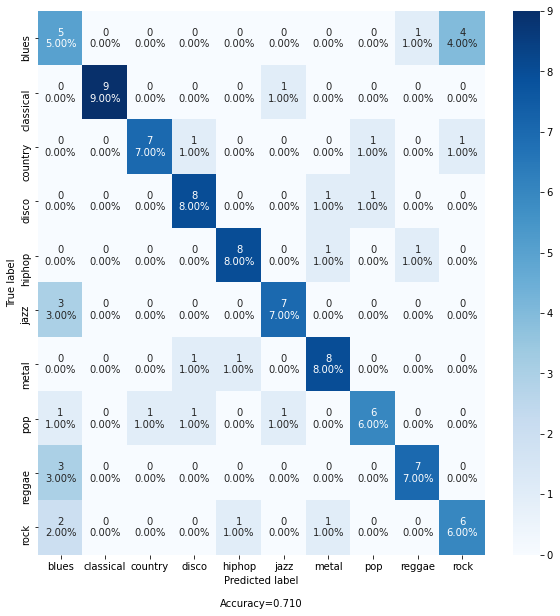

In [ ]:
y_pred = cross_val_predict(???,???,???< cv=10)
conf_mat = ????
????


### 2.4 Zbieramy metryki

Zobaczmy jakie są zdefiniowane...

In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

**TODO**
* Zbierz następujące metryki: accuracy, precision, recall i F1 (trzy ostatnie w wersji makro) stosując walidację krzyzową
* Wyznacz wartości średnie

In [ ]:
scoring = [????]
cv_results = cross_validate(pipeline, X, y, cv=10,scoring=scoring)
print(cv_results)


{'fit_time': array([0.00392675, 0.00172019, 0.00163436, 0.00155759, 0.00153351,
       0.00310588, 0.00277615, 0.0064218 , 0.00354934, 0.00163817]), 'score_time': array([0.00818348, 0.0040741 , 0.00345922, 0.00336766, 0.00323153,
       0.004915  , 0.00447321, 0.00668836, 0.00605726, 0.00348616]), 'test_accuracy': array([0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, 0.5]), 'test_precision_macro': array([0.85      , 0.48333333, 0.43333333, 0.7       , 0.55      ,
       0.85      , 0.5       , 0.7       , 0.85      , 0.38333333]), 'test_recall_macro': array([0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, 0.5]), 'test_f1_macro': array([0.86666667, 0.51666667, 0.45      , 0.73333333, 0.56666667,
       0.86666667, 0.53333333, 0.73333333, 0.86666667, 0.41666667])}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

In [ ]:
acc= cv_results['test_accuracy'] ????
prec= cv_results['test_precision_macro'] ????
recall= cv_results['test_recall_macro'] ????
f1= cv_results['test_f1_macro'] ????

print(f'acc={acc} prec={prec} recall={recall} f1={f1}')


acc=0.71 prec=0.63 recall=0.71 f1=0.6549999999999999


## 3. Testy wielu klasyfikatorów

Dodamy funkcję, która zbuduje pipeline, wywoła cross_val_predict(), wyznaczy i wyświetli macierz pomyłek.

**TODO**
* Uzupełnij brakujący kod

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
plt.rcParams["figure.figsize"] = (10,10)


def cv_show_confusion_matrix(X,y,labels,scaler,classifier,cv=10,title=None):
  pipeline = ????
  y_pred = ????
  conf_mat = ????
  if title is None:
    title = scaler.__class__.__name__ + " + " + classifier.__class__.__name__
  else:
    title = title+': '+scaler.__class__.__name__ + " + " + classifier.__class__.__name__
  make_confusion_matrix(conf_mat,categories=labels,title=title)


Sprawdzimy, czy działa dla MultinomialMB. Użyjemy parametru ```feature_range=[1,2]```, aby przypadkowo nie dostarczać do ```MultinomialNB``` wartości ujemnych. W nowszej wersji biblioteki jest parametr ```clip``` (przytnij do zakresu).

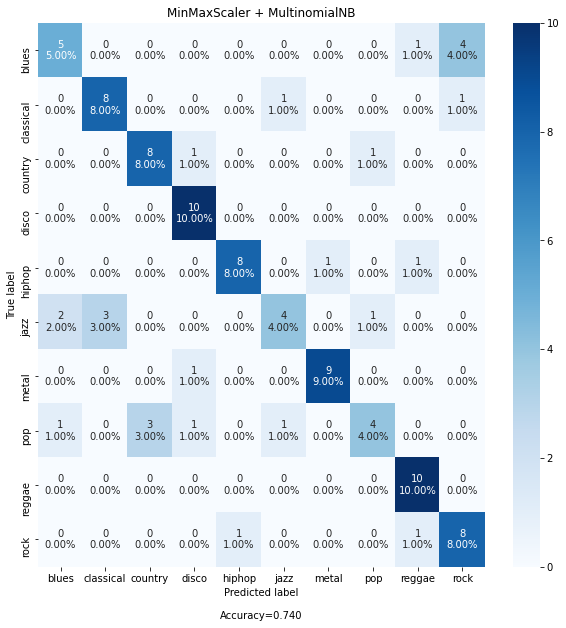

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
cv_show_confusion_matrix(X,y,labels=le.classes_,scaler=MinMaxScaler(feature_range=(1,2)),classifier=MultinomialNB(alpha=0.1))

### 3.1 Tworzymy listę konfiguracji i wyświetlamy macierze pomyłek

In [ ]:
# Szukamy klasyfikatora
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

configs={'gnb':[StandardScaler(),GaussianNB()],
         'mnnb':[MinMaxScaler(feature_range=(1,2)),MultinomialNB(alpha=0.1)],
         'logreg':[StandardScaler(),LogisticRegression()],
         'dt-gini':[StandardScaler(),DecisionTreeClassifier(criterion='gini')],
         'dt-ent':[StandardScaler(),DecisionTreeClassifier(criterion='entropy')],
         'rf':[StandardScaler(),RandomForestClassifier(criterion='entropy')],
         'svc-rbf':[StandardScaler(),SVC()],
         'svc-poly':[StandardScaler(),SVC(kernel='poly',degree=2,C=1e5)],
         '1nn':[StandardScaler(),KNeighborsClassifier(n_neighbors=1)],
         '3nn':[StandardScaler(),KNeighborsClassifier(n_neighbors=3)],
         '5nn':[StandardScaler(),KNeighborsClassifier(n_neighbors=5)],
         }


for k in configs:
  cv_show_confusion_matrix(X,y,labels=le.classes_,scaler=configs[k][0],classifier=configs[k][1],title=k)

### 3.2 Testujemy wszystkie klasyfikatory stosując walidację krzyżową

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.utils import Bunch

scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
results = Bunch()
for k in configs:
  pipeline = make_pipeline(configs[k][0], configs[k][1])
  results[k] = cross_validate(pipeline, X, y, cv=10,scoring=scoring)



Tym razem results jest słownikiem, który nazwie konfiguracji przypisuje wyniki walidacji krzyżowej. A wyniki to odwzorowanie metryka->lista rezultatów.

In [ ]:
# print(results)
for k in results:
  print(k)
  print(results[k])

rdf = pd.DataFrame(results)
rdf.head(10)



gnb
{'fit_time': array([0.00245905, 0.00254273, 0.00585341, 0.00171137, 0.0016284 ,
       0.00164866, 0.00163031, 0.00161242, 0.00161433, 0.00162601]), 'score_time': array([0.00562549, 0.00545812, 0.00421524, 0.00297785, 0.00303388,
       0.0036571 , 0.00360179, 0.00354433, 0.00364614, 0.00387073]), 'test_accuracy': array([0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, 0.5]), 'test_precision_macro': array([0.85      , 0.48333333, 0.43333333, 0.7       , 0.55      ,
       0.85      , 0.5       , 0.7       , 0.85      , 0.38333333]), 'test_recall_macro': array([0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, 0.5]), 'test_f1_macro': array([0.86666667, 0.51666667, 0.45      , 0.73333333, 0.56666667,
       0.86666667, 0.53333333, 0.73333333, 0.86666667, 0.41666667])}
mnnb
{'fit_time': array([0.00129485, 0.00123477, 0.00117803, 0.00118399, 0.00122023,
       0.00119734, 0.00119185, 0.00119352, 0.00119257, 0.00118542]), 'score_time': array([0.00333858, 0.00303149, 0.00369811, 0.00374579, 0.003

,gnb,mnnb,logreg,dt-gini,dt-ent,rf,svc-rbf,svc-poly,1nn,3nn,5nn
fit_time,"[0.0024590492248535156, 0.002542734146118164, ...","[0.001294851303100586, 0.0012347698211669922, ...","[0.026619434356689453, 0.027493953704833984, 0...","[0.0037851333618164062, 0.005807638168334961, ...","[0.010732173919677734, 0.010654449462890625, 0...","[0.20742011070251465, 0.21255922317504883, 0.2...","[0.0039463043212890625, 0.0039713382720947266,...","[0.003782987594604492, 0.0037479400634765625, ...","[0.0013501644134521484, 0.0013535022735595703,...","[0.0014262199401855469, 0.0011987686157226562,...","[0.0011196136474609375, 0.0015900135040283203,..."
score_time,"[0.005625486373901367, 0.00545811653137207, 0....","[0.0033385753631591797, 0.003031492233276367, ...","[0.0024259090423583984, 0.0032320022583007812,...","[0.0038521289825439453, 0.0034050941467285156,...","[0.003520488739013672, 0.003438711166381836, 0...","[0.010450124740600586, 0.011397838592529297, 0...","[0.0030863285064697266, 0.0036978721618652344,...","[0.003726959228515625, 0.004262447357177734, 0...","[0.004256486892700195, 0.004628181457519531, 0...","[0.004150390625, 0.00372314453125, 0.004664897...","[0.0043430328369140625, 0.004248142242431641, ..."
test_accuracy,"[0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, ...","[0.8, 0.8, 0.6, 0.7, 0.7, 0.8, 0.7, 0.7, 0.9, ...","[1.0, 0.8, 0.7, 0.7, 0.8, 0.8, 0.9, 0.8, 0.9, ...","[0.6, 0.4, 0.5, 0.5, 0.3, 0.6, 0.7, 0.5, 0.5, ...","[0.6, 0.2, 0.5, 0.6, 0.5, 0.6, 0.7, 0.6, 0.7, ...","[0.8, 0.7, 0.5, 0.8, 0.9, 0.9, 0.6, 0.9, 0.8, ...","[0.7, 0.7, 0.8, 0.8, 0.7, 0.8, 0.9, 0.9, 0.7, ...","[0.7, 0.6, 0.5, 0.8, 0.8, 0.7, 0.7, 0.8, 0.7, ...","[0.5, 0.7, 0.7, 0.7, 0.7, 0.8, 1.0, 0.7, 0.7, ...","[0.5, 0.6, 0.7, 0.7, 0.6, 0.8, 0.7, 0.6, 0.8, ...","[0.6, 0.7, 0.6, 0.7, 0.5, 0.8, 0.7, 0.7, 0.9, ..."
test_precision_macro,"[0.85, 0.4833333333333333, 0.4333333333333333,...","[0.7, 0.75, 0.4833333333333333, 0.6, 0.6, 0.73...","[1.0, 0.7, 0.55, 0.55, 0.75, 0.733333333333333...","[0.6, 0.2833333333333333, 0.38333333333333336,...","[0.5, 0.15, 0.35, 0.5, 0.4, 0.4833333333333333...","[0.7, 0.625, 0.4, 0.7, 0.85, 0.85, 0.483333333...","[0.6, 0.6, 0.7, 0.7, 0.55, 0.7333333333333333,...","[0.65, 0.45, 0.3333333333333333, 0.7, 0.7, 0.5...","[0.45, 0.65, 0.6333333333333333, 0.55, 0.6, 0....","[0.4, 0.4333333333333333, 0.55, 0.55, 0.483333...","[0.5, 0.6333333333333333, 0.4, 0.5833333333333..."
test_recall_macro,"[0.9, 0.6, 0.5, 0.8, 0.6, 0.9, 0.6, 0.8, 0.9, ...","[0.8, 0.8, 0.6, 0.7, 0.7, 0.8, 0.7, 0.7, 0.9, ...","[1.0, 0.8, 0.7, 0.7, 0.8, 0.8, 0.9, 0.8, 0.9, ...","[0.6, 0.4, 0.5, 0.5, 0.3, 0.6, 0.7, 0.5, 0.5, ...","[0.6, 0.2, 0.5, 0.6, 0.5, 0.6, 0.7, 0.6, 0.7, ...","[0.8, 0.7, 0.5, 0.8, 0.9, 0.9, 0.6, 0.9, 0.8, ...","[0.7, 0.7, 0.8, 0.8, 0.7, 0.8, 0.9, 0.9, 0.7, ...","[0.7, 0.6, 0.5, 0.8, 0.8, 0.7, 0.7, 0.8, 0.7, ...","[0.5, 0.7, 0.7, 0.7, 0.7, 0.8, 1.0, 0.7, 0.7, ...","[0.5, 0.6, 0.7, 0.7, 0.6, 0.8, 0.7, 0.6, 0.8, ...","[0.6, 0.7, 0.6, 0.7, 0.5, 0.8, 0.7, 0.7, 0.9, ..."
test_f1_macro,"[0.8666666666666666, 0.5166666666666667, 0.45,...","[0.7333333333333333, 0.7666666666666666, 0.516...","[1.0, 0.7333333333333333, 0.6, 0.6, 0.76666666...","[0.6, 0.31666666666666665, 0.41666666666666663...","[0.5333333333333333, 0.16666666666666666, 0.4,...","[0.7333333333333333, 0.64, 0.4333333333333333,...","[0.6333333333333333, 0.6333333333333333, 0.733...","[0.6666666666666666, 0.5, 0.3833333333333333, ...","[0.4666666666666666, 0.6666666666666666, 0.65,...","[0.4333333333333333, 0.4833333333333333, 0.6, ...","[0.5333333333333333, 0.65, 0.4666666666666666,..."


**TODO**
* Rozpakujmy te wyniki, tak aby w tabeli summary znalazły się wiersze podające średnie wartości metryk dla poszczególnych klasyfikatorów.

In [ ]:
summary = pd.DataFrame(columns=['classifier','acc','prec','recall','f1'])
for k in results:
  row=[???, ???, ???,????,????]
  # print(row)
  summary.loc[len(summary),:]=row
summary.head(20)



,classifier,acc,prec,recall,f1
0,gnb,0.71,0.63,0.71,0.655
1,mnnb,0.74,0.651667,0.74,0.68
2,logreg,0.8,0.713333,0.8,0.741667
3,dt-gini,0.5,0.381667,0.5,0.418333
4,dt-ent,0.55,0.446667,0.55,0.48
5,rf,0.75,0.660833,0.75,0.689
6,svc-rbf,0.77,0.673333,0.77,0.705
7,svc-poly,0.69,0.57,0.69,0.608333
8,1nn,0.7,0.618333,0.7,0.643333
9,3nn,0.66,0.53,0.66,0.571667


### 3.3 Boxplots

Rysujemy wykres *boxplots*. Przeczytaj, jak należy go interpretować [Wikipedia](https://en.wikipedia.org/wiki/Box_plot)

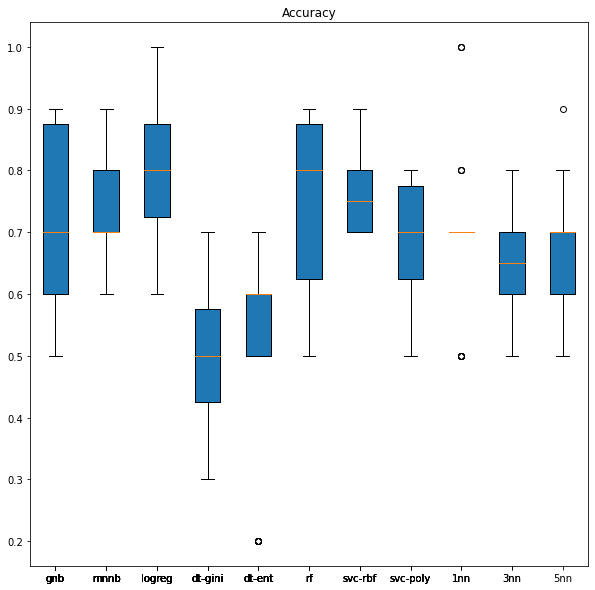

In [ ]:
labels=[]
data=[]
for k in results:
  labels.append(k)
  data.append(results[k]['test_accuracy'])
  plt.boxplot(data,vert=True,  # vertical box alignment
                  patch_artist=True,  # fill with color
                  labels=labels)
  plt.title('Accuracy')


**TODO**
* Obserwując wartości F1, który klasyfikator wydaje się najlepszy (dla tego zbioru danych)
* Czy 1nn jest "lepszy" niż 3nn?

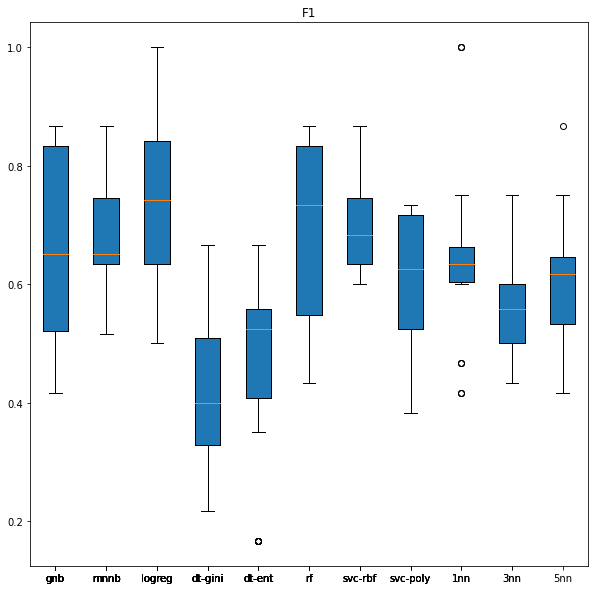

In [ ]:
labels=[]
data=[]
for k in results:
  labels.append(k)
  data.append(results[k]['test_f1_macro'])
  plt.boxplot(data,vert=True,  # vertical box alignment
                  patch_artist=True,  # fill with color
                  labels=labels)
  plt.title('F1')


## 4. Optymalizacja parametrów
Zakładając, że mamy zbiory parametrów $A$, $B$, $C$,...,$Z$ procedura *grid search* bada wszystkie kombinacje ze zbioru $A \times B \times C \times \dots Z$, natomiast *random search* losowo wybiera określoną liczbę kombinacji.


### 4.1 Grid search

Zastosujemy do regresji logistycznej. W rzeczywistości będziemy dobierali tylko jeden parameter.

In [ ]:
from sklearn.model_selection import GridSearchCV
pipeline = make_pipeline(configs['logreg'][0], configs['logreg'][1])
pipeline


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

StandardScaler nie ma zbyt wielu parametrów, ale LogisticRegresion można dobierać stałą regularyzacji C.

Sprawdźmy, jakie nazwy maja parametry dla pipeline...


In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [ ]:

C=[100,50,20,10,8,5,3,2,1.0,0.8,0.5,0.2,0.1,0.05]
print(C)
params={'logisticregression__C':C}
grid = GridSearchCV(pipeline, params, scoring="f1_macro",cv=10, verbose=3)
grid.fit(X, y)
grid.best_params_

In [ ]:
pipeline=make_pipeline(StandardScaler(), LogisticRegression(C=grid.best_params_['logisticregression__C']))
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
# scoring = scoring=['accuracy','f1_macro']
cv_results = cross_validate(pipeline, X, y, cv=10,scoring=scoring)
for k in cv_results:
  print(f'{k}={cv_results[k].mean()}')

### 4.2 Random search

Zastosujemy do SVM z kernelem RBF.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
pipeline = make_pipeline(configs['svc-rbf'][0], configs['svc-rbf'][1])
pipeline


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

Użyjemy klasy ```RandomizedSearchCV```.  Parametr ```n_iter``` określa, ile konfiguracji będzie testowane. Zdefiniujemy 10000 konfiguracji.

Wypróbujemy dwa parametry C oraz gamma.

**TODO**
* Zdefiniuj C jako listę/wektor 100 wartości od 0 do 2
* Zdefiniuj gamma jako listę/wektor 100 wartości od 0.01 do 2

In [ ]:
C=np.????
gamma=np.????
params={'svc__C':C,'svc__gamma':gamma}
grid = RandomizedSearchCV(pipeline, params, scoring="f1_macro",cv=10, n_iter=100,verbose=3)
grid.fit(X, y)
grid.best_params_

In [ ]:
pipeline = make_pipeline(configs['svc-rbf'][0], SVC(kernel='rbf',C=grid.best_params_['svc__C'],gamma=grid.best_params_['svc__gamma']))
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']

cv_results = cross_validate(pipeline, X, y, cv=10,scoring=scoring)
for k in cv_results:
  print(f'{k}={cv_results[k].mean()}')

# Klasteryzacja

In [ ]:
# Przeskalujemy wszystko

scl = StandardScaler()
Z = scl.fit_transform(X)

Oceń podobieństwo utworów na podstawie wyników klasteryzacji...

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
plt.rcParams["figure.figsize"] = (12,25)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(Z)
print(model.labels_)

plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=10,labels=df.file.to_numpy(),orientation='right')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

print(df.file.to_numpy())